In [1]:
# Importo las librerias 'pandas' y 'numpy'

import pandas as pd                      # pandas: librería para el análisis de datos
import numpy as np                       # numpy: librería especializada en el cálculo numérico y análisis de datos

# Importo las librerías y paquetes necesarios para llevar a cabo el clustering

import matplotlib.pyplot as plt          # matplotlib: Libreria para realizar gráficos
from sklearn.cluster import KMeans       # Importo la función 'Kmeans' del módulo 'cluster ' del paquete sklearn

# También voy a necesitar 'pandas' y 'numpy' pero ya fueron importadas al inicio del notebook

In [2]:
# Para realizar los radar charts de las jugadoras con caracteristicas similares a la que buscamos, necesitermos le paquete 'pygal'

import pygal

Como el paquete 'pygal' no esta incluido en Anaconda, debo instalarlo para poder utilizarlo En el repositorio se encuentra el archivo 'pygal-2.4.0-py2.py3-none-any.whl' necesario para la instalación

In [3]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


In [4]:
tabla = pd.read_excel ('Goalkeepers_Liga_iberdrola_Stats.xlsx') 

In [5]:
tabla.head()

,Name,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,...,Matches played,Nationality,National_team,Foot,Age,Height,Weight,% of successful cross and pass interception attempts,"Shots saved, %","Accurate passes, %"
0,Meline Gerard,10.966667,4.933333,1.900000,3.100000,1.066667,16.100000,1.466667,1.333333,34.600000,...,30,France,0,Right,31,168,61,91,63,84
1,Sandra Panos,5.363636,2.121212,0.545455,1.575758,0.272727,6.424242,0.606061,0.575758,22.636364,...,33,Spain,Spain,Right,28,169,65,95,74,90
2,Gemma Font Oliveras,2.400000,1.000000,0.400000,0.600000,0.200000,3.800000,0.000000,0.000000,16.000000,...,5,Spain,0,Both,21,165,60,0,60,95
3,Catalina Thomas,6.000000,2.153846,0.384615,1.769231,0.615385,6.769231,0.538462,0.538462,27.153846,...,13,Spain,Spain U19,Both,20,170,0,100,82,91
4,Esther Sullastres,13.541667,6.750000,2.000000,4.833333,1.208333,19.000000,1.208333,1.083333,31.750000,...,24,Spain,0,Both,28,173,58,90,72,74


In [6]:
# Transformo la columna name en el indice

tabla.set_index ('Name', inplace = True)
tabla.head()

,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,Accurate passes,...,Matches played,Nationality,National_team,Foot,Age,Height,Weight,% of successful cross and pass interception attempts,"Shots saved, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Meline Gerard,10.966667,4.933333,1.900000,3.100000,1.066667,16.100000,1.466667,1.333333,34.600000,29.100000,...,30,France,0,Right,31,168,61,91,63,84
Sandra Panos,5.363636,2.121212,0.545455,1.575758,0.272727,6.424242,0.606061,0.575758,22.636364,20.393939,...,33,Spain,Spain,Right,28,169,65,95,74,90
Gemma Font Oliveras,2.400000,1.000000,0.400000,0.600000,0.200000,3.800000,0.000000,0.000000,16.000000,15.200000,...,5,Spain,0,Both,21,165,60,0,60,95
Catalina Thomas,6.000000,2.153846,0.384615,1.769231,0.615385,6.769231,0.538462,0.538462,27.153846,24.769231,...,13,Spain,Spain U19,Both,20,170,0,100,82,91
Esther Sullastres,13.541667,6.750000,2.000000,4.833333,1.208333,19.000000,1.208333,1.083333,31.750000,23.583333,...,24,Spain,0,Both,28,173,58,90,72,74


In [7]:
tabla.drop (['Team','Matches played','Nationality','National_team','Foot',
                     'Age','Height','Weight'], axis = 1, inplace = True)

In [8]:
# Normalizo los datos pero esta vez con 'tabla' que mantiene los nombres como indice
df_normalizado = (tabla - tabla.min()) / (tabla.max() - tabla.min())
df_normalizado.head()

,Opponent's shots,Opponents' shots on target,Goals conceded,Shots saved,Supersaves,Opponent's crosses,Cross and pass interception attempts,Successful cross and pass interception attempts,Passes,Accurate passes,...,Mid range shots,Long range shots,Jumping saves,Saves without jumping,Stopped shots,Shots saved with successful bouncing,Shots saved with unsuccessful bouncing,% of successful cross and pass interception attempts,"Shots saved, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Meline Gerard,0.339050,0.287805,0.356250,0.286260,0.355556,0.573418,0.516432,0.537634,0.836199,0.795283,...,0.304965,0.330000,0.264286,0.350000,0.436508,0.172222,0.366667,0.91,0.383333,0.627907
Sandra Panos,0.117294,0.082040,0.102273,0.111728,0.090909,0.205984,0.213402,0.232160,0.538462,0.548885,...,0.119923,0.151515,0.084416,0.233766,0.306638,0.065657,0.060606,0.95,0.566667,0.767442
Gemma Font Oliveras,0.000000,0.000000,0.075000,0.000000,0.066667,0.106329,0.000000,0.000000,0.373303,0.401887,...,0.000000,0.100000,0.000000,0.128571,0.119048,0.033333,0.000000,0.00,0.333333,0.883721
Catalina Thomas,0.142480,0.084428,0.072115,0.133881,0.205128,0.219085,0.189599,0.217122,0.650888,0.672714,...,0.148936,0.223077,0.115385,0.230769,0.297619,0.102564,0.000000,1.00,0.700000,0.790698
Esther Sullastres,0.440963,0.420732,0.375000,0.484733,0.402778,0.683544,0.425469,0.436828,0.765271,0.639151,...,0.450355,0.329167,0.250000,0.642857,0.706845,0.222222,0.375000,0.90,0.533333,0.395349


In [9]:
# Es necesario decidir que caracteristicas del juego son necesarias para las distintas demarcaciones
# Para ello vamos a una lista con los tipos de caract. del juego

index_columns = tabla.columns                      # Obtengo una lista con las etiquetas de las columnas
lista_nombres_columnas = list(index_columns)          # Almaceno en una variable dicha lista con los nombres de las columnas.
lista_nombres_columnas

["Opponent's shots",
 "Opponents' shots  on target",
 'Goals conceded',
 'Shots saved',
 'Supersaves',
 "Opponent's crosses",
 'Cross and pass interception attempts',
 'Successful cross and pass interception attempts',
 'Passes',
 'Accurate passes',
 'Foot passes from open play',
 'Hand passes',
 'Passes from set pieces',
 'Long passes',
 'Close range shots',
 'Mid range shots',
 'Long range shots',
 'Jumping saves',
 'Saves without jumping',
 'Stopped shots',
 'Shots saved with successful bouncing',
 'Shots saved with unsuccessful bouncing',
 '% of successful cross and pass interception attempts',
 'Shots saved, %',
 'Accurate passes, %']

In [ ]:

 
 
 'Long range shots',
 'Jumping saves',
 'Saves without jumping',
 'Stopped shots',
 'Shots saved with successful bouncing',
 'Shots saved with unsuccessful bouncing',
 '% of successful cross and pass interception attempts',
 'Shots saved, %',
 'Accurate passes, %']

In [26]:
len(lista_nombres_columnas)

25

In [12]:
# Tengo que hacer pasos anteriores como juntar todas las filas de cada jugadora en una unica tabla y normalizar los datos

def radar_chart1 (name_player):
    

    features = ["Opponent's shots","Opponents' shots  on target",'Goals conceded','Shots saved','Supersaves',
                "Opponent's crosses",'Cross and pass interception attempts',
                'Successful cross and pass interception attempts']
    
    features_data = [df_normalizado.loc [name_player,"Opponent's shots"],
                     df_normalizado.loc [name_player,"Opponents' shots  on target"],
                     df_normalizado.loc [name_player,'Goals conceded'], 
                     df_normalizado.loc [name_player,'Shots saved'],
                     df_normalizado.loc [name_player,'Supersaves'], 
                     df_normalizado.loc [name_player,"Opponent's crosses"],
                     df_normalizado.loc [name_player,'Cross and pass interception attempts'],
                     df_normalizado.loc [name_player,'Successful cross and pass interception attempts']]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

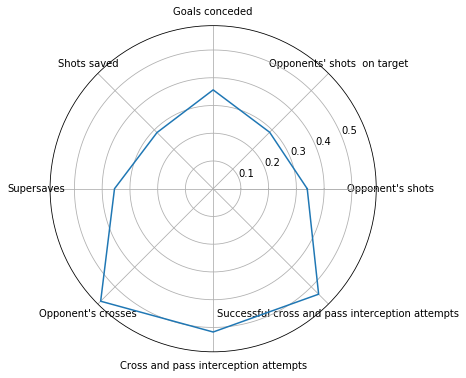

In [13]:
radar_chart1 ('Meline Gerard')

In [14]:
def radar_chart2 (name_player):
    

    features = ['Passes','Accurate passes','Foot passes from open play','Hand passes','Passes from set pieces',
                'Long passes','Close range shots','Mid range shots']
    
    features_data = [df_normalizado.loc [name_player,"Passes"],
                     df_normalizado.loc [name_player,"Accurate passes"],
                     df_normalizado.loc [name_player,'Foot passes from open play'], 
                     df_normalizado.loc [name_player,'Hand passes'],
                     df_normalizado.loc [name_player,'Passes from set pieces'], 
                     df_normalizado.loc [name_player,"Long passes"],
                     df_normalizado.loc [name_player,'Close range shots'],
                     df_normalizado.loc [name_player,'Mid range shots']]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

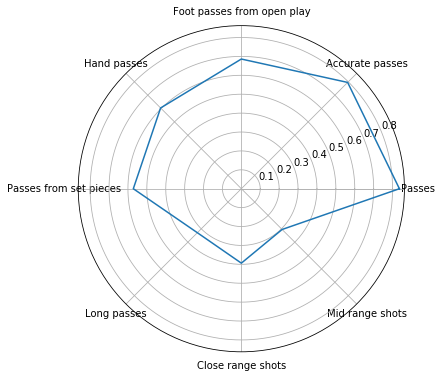

In [15]:
radar_chart2 ('Meline Gerard')

In [16]:
def radar_chart3 (name_player):
    

    features = ['Long range shots','Jumping saves','Saves without jumping','Stopped shots',
                'Shots saved with successful bouncing','Shots saved with unsuccessful bouncing',
                '% of successful cross and pass interception attempts','Shots saved, %']
    
    features_data = [df_normalizado.loc [name_player,"Long range shots"],
                     df_normalizado.loc [name_player,"Jumping saves"],
                     df_normalizado.loc [name_player,'Saves without jumping'], 
                     df_normalizado.loc [name_player,'Stopped shots'],
                     df_normalizado.loc [name_player,'Shots saved with successful bouncing'], 
                     df_normalizado.loc [name_player,"Shots saved with unsuccessful bouncing"],
                     df_normalizado.loc [name_player,'% of successful cross and pass interception attempts'],
                     df_normalizado.loc [name_player,'Shots saved, %']]
    
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

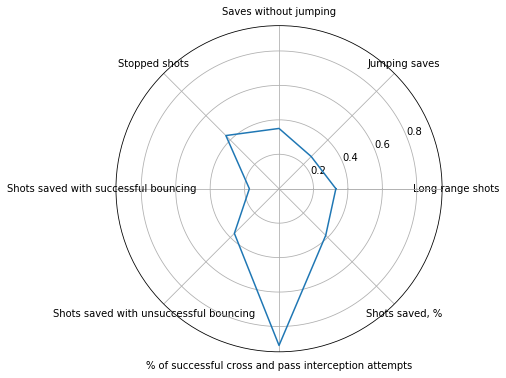

In [17]:
radar_chart3 ('Meline Gerard')